In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,Reshape,Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

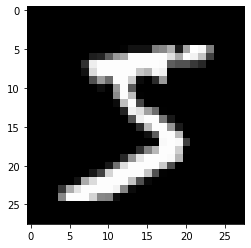

In [4]:
plt.imshow(x_train[0], cmap = "gray")
plt.show()

In [5]:
LATENT_SIZE = 32

In [6]:
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    Dropout(0.5),
    Dense(256),
    Dropout(0.5),
    Dense(128),
    Dropout(0.5),
    Dense(64),
    Dropout(0.5),
    Dense(LATENT_SIZE),
])

In [7]:
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    Dropout(0.5),
    Dense(128),
    Dropout(0.5),
    Dense(256),
    Dropout(0.5),
    Dense(512),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

In [8]:
img = Input(shape = (28, 28))

In [9]:
latent_vector = encoder(img)
output = decoder(latent_vector)

In [10]:
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")

In [11]:
EPOCHS = 60

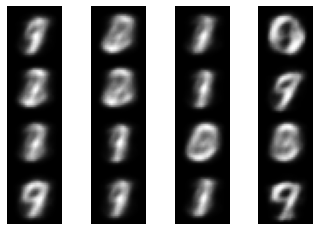

----------- EPOCH 1 -----------
 931/1875 [=============>................] - ETA: 19s - loss: 0.2285

KeyboardInterrupt: 

In [12]:
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4)
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
    display.clear_output() # If you imported display from IPython
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(x_train, x_train)